In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
originalDataPath = '/home/hduser0539/projectsData/privateProjectData/facial-keypoints-detection'
testFile = 'test.csv'
testResultFile='test_result.csv'
testFilePath = os.path.join(originalDataPath,testFile)
testResultFilePath = os.path.join(originalDataPath,testResultFile)

In [29]:
testDf = pd.read_csv(testFilePath)
testResultDf = pd.read_csv(testResultFilePath)
print(testDf.shape)
print(testResultDf.shape)
print(testDf.columns)

(1783, 2)
(1783, 30)
Index(['ImageId', 'Image'], dtype='object')


In [36]:
testDf['aImage'] = testDf['Image'].apply(lambda img : np.fromstring(img,sep=' '))
X_df = np.vstack(testDf['aImage'].values) / 255.


In [37]:
Y_df = testResultDf.values

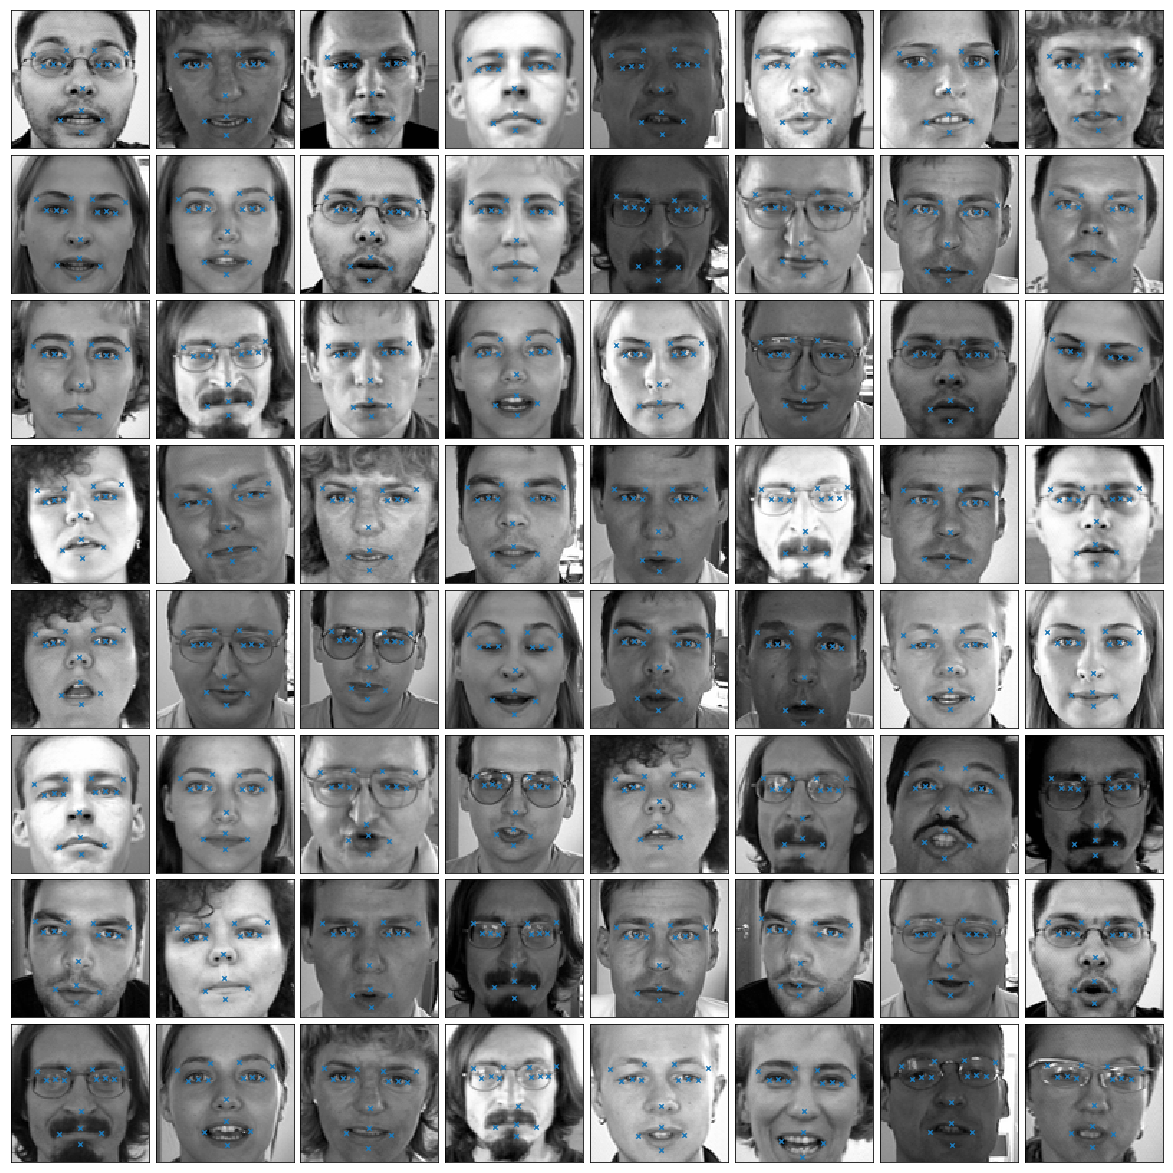

In [41]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2], y[1::2], marker='x', s=20)
X = X_df 
y_pred = Y_df

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

plt.show()

In [57]:
originalDataPath = '/home/hduser0539/projectsData/privateProjectData/facial-keypoints-detection'
testResultFile='test_result.csv'
IdlookFile = 'IdLookupTable.csv'
testResutlDf = pd.read_csv(os.path.join(originalDataPath,testResultFile))
IdLookDf = pd.read_csv(os.path.join(originalDataPath,IdlookFile))
subMissionDf = pd.read_csv(os.path.join(originalDataPath,'SampleSubmission.csv'))

In [72]:
print(IdLookDf.shape)
print(subMissionDf.shape)


(27124, 4)
(27124, 2)


In [79]:
for row in IdLookDf.iterrows():
    row_index = row[0]
    row_item = row[1]
    value = testResultDf.get_value(index=int(row_item['ImageId'])-1,col=row_item['FeatureName'])
    value = "%.4f"%(value)
    subMissionDf.loc[subMissionDf['RowId'] == row_item['RowId'],'Location'] = value
print(subMissionDf.head())

   RowId Location
0      1  66.6374
1      2  36.8033
2      3  28.9312
3      4  36.8721
4      5  60.0972


In [80]:
subMissionDf.to_csv(os.path.join(originalDataPath,'SampleSubmission_result.csv'),index=False)